# **Neural Network**
Imagine that you work for SL, and that one of your customers' biggest complaints is that they don't know what's the arrival delay for their buses. You decide to do something about it by building a model to predict the arrival delay at one bus stop. You intend to use the massive amounts of delay data the company has collected over the years to build a machine-learning model.

# **TASK 1:Develop the neural network model for the bus arrival time delay prediction.​**
As discussed in the lecture, the bus arrival time delay prediction problem is modeled as a regression problem. The task will use the simple 2-layers fully connected neural network model as the example and guide you through the step-by-step process of the whole process of the model development.


## Load and prepare the data
Start by loading the dataset and shaping it so that it's suitable for use in machine learning. This dataset is a subset of a much larger dataset. The data requires an amount of prep work before it's of any use at all. We here use url link to load the data. If you cannot load the data via URL link, please download the data from GitHub and upload the data to colab manually.

In [1]:
import pandas as pd

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507
5,01/05/2022 20:46,10261,44413,3,-17,0,109,-15,115.550725
6,01/05/2022 21:02,10261,45540,3,37,0,109,46,115.428571
7,01/05/2022 21:17,10261,41724,3,0,26,109,16,108.761194
8,01/05/2022 21:31,10261,44417,3,-6,14,109,-36,108.147059
9,01/05/2022 21:46,10261,45544,3,-39,0,109,-18,108.391304


How many rows and columns does the dataset contain?

In [2]:
df.shape

(4962, 9)

Are any of the columns missing values?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


For simplicity, we only use 1000 records here. If your computer cannot run this tutorial in a short time, please set a smaller number in the following code. For example, 800.

In [4]:
df = df.iloc[:1000]

Remove columns that are no longer needed.

In [5]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Draw a histogram by using seaborn to show the distribution of arrival delay.

<Axes: xlabel='Arrival_delay', ylabel='Count'>

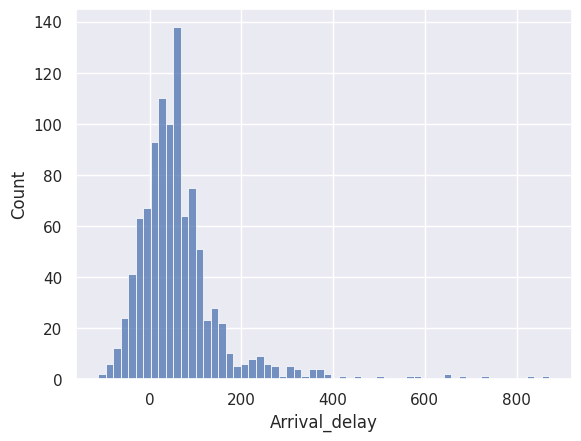

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of the plots using Seaborn.
sns.set()

# Create a histogram plot of the 'Arrival_delay' column from the DataFrame 'df'.
sns.histplot(x=df['Arrival_delay'])


Find out how much influence input variables such as "Upstream_stop_delay" and "Dwell_time" have on the values in the "Arrival_delay" column.

In [7]:
# Calculate the correlation matrix for all columns in the DataFrame 'df'.
corr_matrix = df.corr()
# Sort the correlations between the 'Arrival_delay' column and other columns in descending order.
# This shows the correlation coefficients for each column with respect to 'Arrival_delay'.
correlations_with_arrival_delay = corr_matrix['Arrival_delay'].sort_values(ascending=False)

Feature engineering visually explore and understand the relationships between different features (variables) in a dataset. Seaborn pair plots help identify patterns, correlations, and potential outliers, aiding in the selection and transformation of features to improve model performance. It is a crucial step in data preprocessing to enhance the accuracy and effectiveness of machine learning models.​

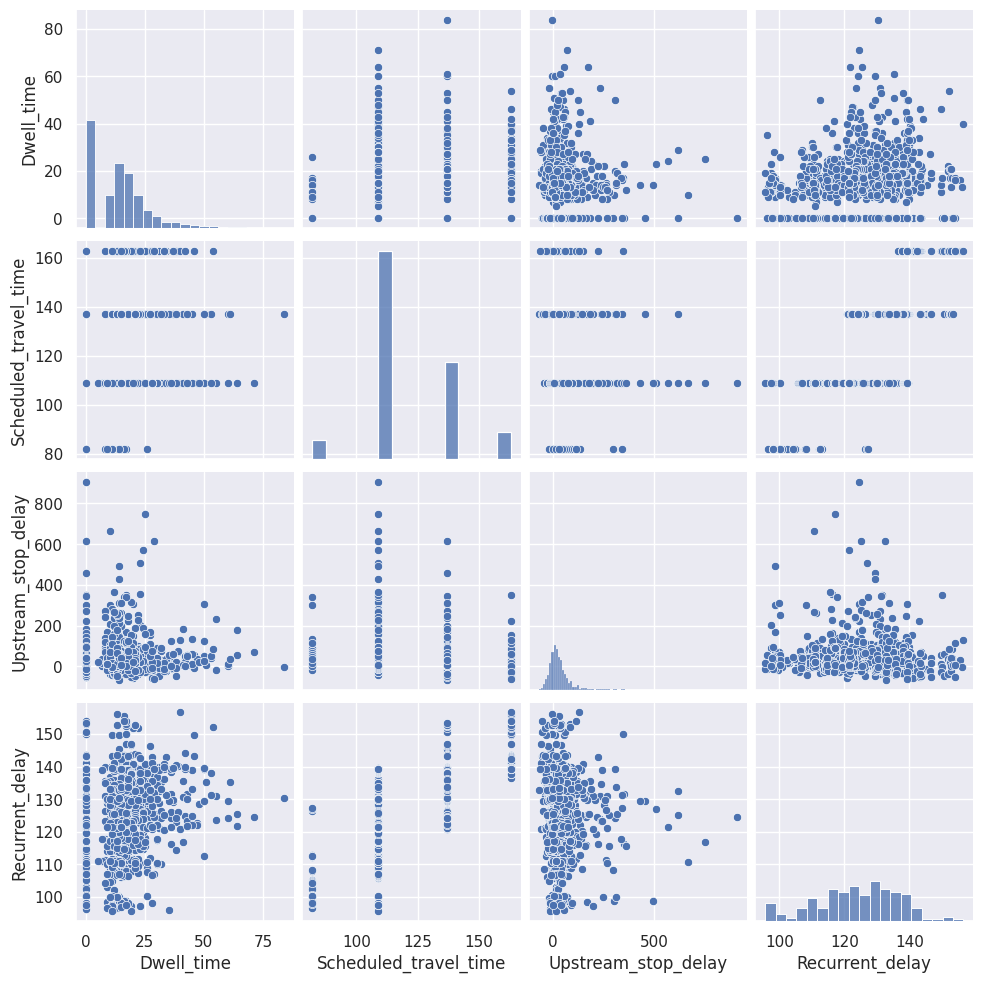

In [8]:
# Create a DataFrame 'x' containing all columns except 'Arrival_delay'.
x = df.drop(['Arrival_delay'], axis=1)
# Create a Series 'y' containing only the 'Arrival_delay' column.
y = df['Arrival_delay']
# Use Seaborn's pairplot to visualize pairwise relationships between the features in 'x'.
sns.pairplot(x)

## Create a neural network model
Now it's time build a neural network and train it with the data prepared in the previous exercise. We'll try neural network first and use cross-validation its meaasure accuracy.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))
# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,337 (9.13 KB)

 Trainable params: 2,337 (9.13 KB)

 Non-trainable params: 0 (0.00 B)

## Training and prediction
We split the dataset into a training and a test dataset. Then, we fit the neural network model with the training dataset and predict the values for the test dataset.

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 60.6093 - mae: 60.6093 - val_loss: 44.1726 - val_mae: 44.1726
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49.9851 - mae: 49.9851 - val_loss: 36.9523 - val_mae: 36.9523
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 39.2073 - mae: 39.2073 - val_loss: 31.1490 - val_mae: 31.1490
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.2928 - mae: 30.2928 - val_loss: 33.8408 - val_mae: 33.8408
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.2258 - mae: 31.2258 - val_loss: 32.9707 - val_mae: 32.9707
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.3561 - mae: 29.3561 - val_loss: 32.2438 - val_mae: 32.2438
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.5042 - mae: 29.5042 - val_loss: 32.3770 - val_mae: 32.3770
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.3946 - mae: 29.3946 - val_loss: 32.4246 - val_mae: 32.4246
Epoch 9/200
20/20 ━━━━━━━━━━━━━

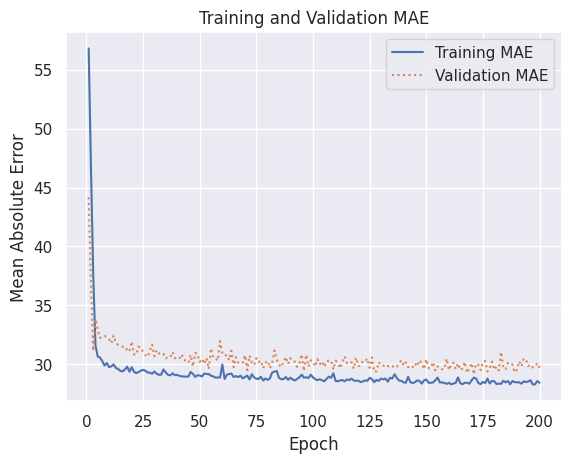

In [10]:
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets, with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

## Evaluate the model
You can evaluate the model's performance using various metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2).

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE) between the true and predicted values.
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2 = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 27.206647872924805
Mean Squared Error: 1359.1925048828125
R-squared: 0.8847945928573608


## Visualize the Results
we create a "Actual vs. Predicted Values" graph to give a visual inspection of the prediction quality.

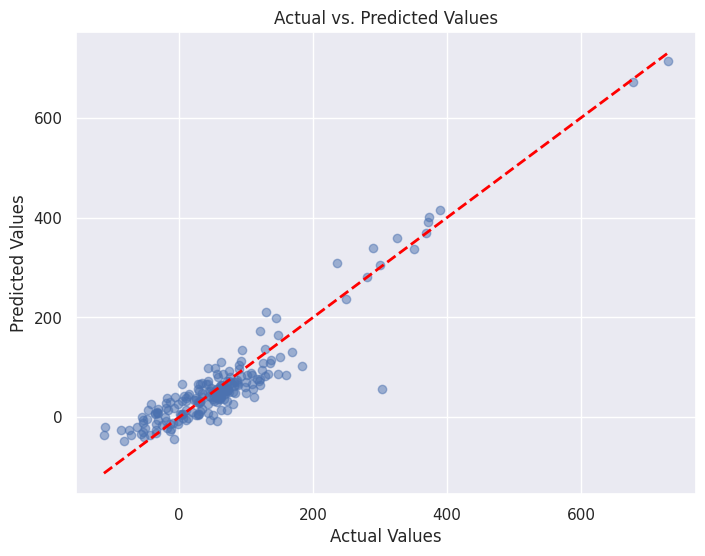

In [12]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

# **Task 2: Practical NN training techniques**
The task will illustrate some useful NN training techniques, including saving and loading the trained model, using the callback function to save the best model, and adding dropout layers.


Reloading Tuner from tuner_dir_no_dropout/bus_delay_no_dropout/tuner0.json

Best hyperparameters: {'units_1': 256, 'units_2': 256, 'third_layer': True, 'learning_rate': 0.001, 'units_3': 128}
Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.7687 - mae: 58.7687  
Epoch 1: val_mae improved from inf to 39.65546, saving model to weights.best.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 57.4246 - mae: 57.4246 - val_loss: 39.6555 - val_mae: 39.6555 - learning_rate: 0.0010
Epoch 2/200
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.0412 - mae: 33.0412 
Epoch 2: val_mae improved from 39.65546 to 34.19429, saving model to weights.best.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 33.0601 - mae: 33.0601 - val_loss: 34.1943 - val_mae: 34.1943 - learning_rate: 0.0010
Epoch 3/200
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.4565 - mae: 31.4565  
Epoch 3: val_mae improved from 34.19429 to 33.67913, saving model to weights.best.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31.4009 - mae: 31.4009 - val_loss: 33.6791 - val_mae: 33.6791 - learning_rate: 0.0010
Epoch 4/200
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.3694 - mae: 30.3694 
Epoch 4: val_mae im

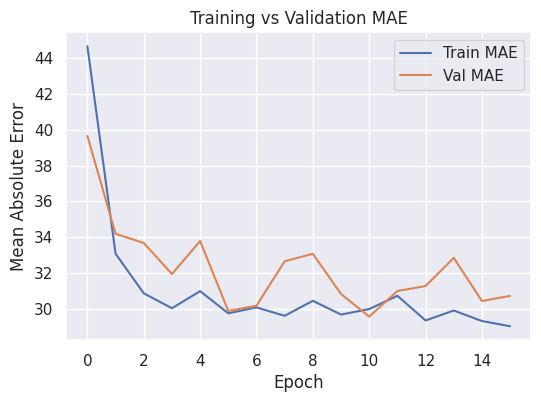

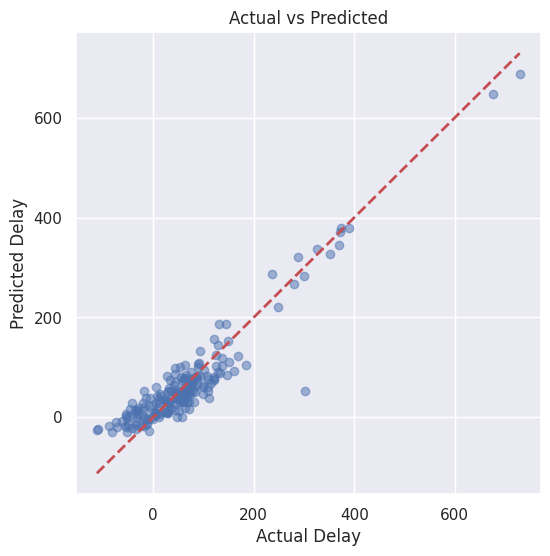

In [21]:
# ======================= Imports =======================
!pip install keras-tuner
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import keras_tuner as kt


# ======================= Data ==========================
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'
df = pd.read_csv(url).iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

X = df.drop('Arrival_delay', axis=1)
y = df['Arrival_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==================== HyperModel =======================
def build_model(hp):
    model = Sequential()
    # 1st hidden layer
    model.add(Dense(
        units=hp.Int('units_1', 32, 256, step=32),
        activation='relu', input_dim=4))
   # model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

    # 2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_2', 32, 256, step=32),
        activation='relu'))
   # model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))

    # Optional 3rd layer
    if hp.Boolean('third_layer'):
        model.add(Dense(
            units=hp.Int('units_3', 32, 128, step=32),
            activation='relu'))
   #     model.add(Dropout(hp.Float('dropout_3', 0.1, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    lr = hp.Choice('learning_rate', [1e-3, 5e-4, 1e-4])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='mae', metrics=['mae'])
    return model

# ==================== Hyperparameter Search ============
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=20,
    directory='tuner_dir_no_dropout',   # <-- NEW directory
    project_name='bus_delay_no_dropout' # <-- NEW project name
)


early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

tuner.search(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

best_hps = tuner.get_best_hyperparameters(1)[0]
print("\nBest hyperparameters:", best_hps.values)

# =================== Train Best Model ===================
model = tuner.hypermodel.build(best_hps)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
checkpoint_path = "weights.best.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_mae',
                             save_best_only=True, mode='min', verbose=1)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

# ===================== Evaluation =======================
# Load the best saved weights (ensures best epoch)
best_model = load_model(checkpoint_path)

y_pred = best_model.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("\n--- Final Test Metrics ---")
print(f"Mean Absolute Error : {mae:.4f}")
print(f"Mean Squared Error  : {mse:.4f}")
print(f"R-squared (R²)      : {r2:.4f}")

# ===================== Plots ============================
sns.set()
plt.figure(figsize=(6,4))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epoch"); plt.ylabel("Mean Absolute Error")
plt.title("Training vs Validation MAE")
plt.legend(); plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Actual vs Predicted")
plt.show()
